## Comparing inter-attribute logical dependencies of synthetic data generated by state-of-the art generative models with respect to the real data
- Load real data and synthetic data generated by seven generative models
- Apply Q_function on real and synthetic data to check the inter-attribute logical dependencies (only for categorical features)
- Extract inter-attribute logical dependencies of real and synthetic data based on Q_scores
- If Q_score for a perticular pair of features is 0 then those features are functionally dependent, if Q_score is 1 then they are independent of each other and if Q_scores lies between 0 and 1 then those feature pairs are logically dependent
- All the functions related to this notebook are in the file Functions.py 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from Functions import *

## Real_data

In [2]:
data = pd.read_csv('Real_datasets/merged_airbnb_reduced.csv')

In [3]:
data.columns

Index(['id', 'gender', 'age', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser',
       'country_destination', 'action', 'action_type', 'action_detail',
       'device_type', 'secs_elapsed'],
      dtype='object')

In [4]:
categorical_features = categorical_features = ['id','gender','signup_method','signup_flow','language','affiliate_channel','affiliate_provider','first_affiliate_tracked',
                        'signup_app', 'first_device_type', 'first_browser', 'country_destination','action_type','device_type']

In [5]:
check_categories(data, categorical_features)

There are no features with same entries


In [6]:
data.shape

(3048, 18)

In [7]:
len(categorical_features)

14

In [8]:
data['country_destination'].value_counts()

country_destination
0    2105
1     507
2     172
6      85
4      74
5      40
3      30
9      23
7      12
Name: count, dtype: int64

In [9]:
airbnb_FD_data = data[categorical_features] 
airbnb_FD_data.to_csv('FDTool_data/Airbnb/airbnb_FD_data.csv',index=False)

### If any duplicate entries in the synthetic data remove them

## Synthetic_data generated by CTGAN

In [10]:
ctgan_syn_data = pd.read_csv('Synthetic_datasets/CTGAN/synthetic_airbnb_ctgan.csv')

In [11]:
check_categories(ctgan_syn_data, categorical_features)

There are no features with same entries


In [12]:
airbnb_ctgan_FD_data = ctgan_syn_data[categorical_features] 
airbnb_ctgan_FD_data.to_csv('FDTool_data/Airbnb/airbnb_ctgan_FD_data.csv',index=False)

## Synthetic_data generated by CTABGAN

In [13]:
ctabgan_syn_data = pd.read_csv('Synthetic_datasets/CTABGAN/synthetic_airbnb_ctabgan.csv')

In [14]:
check_categories(ctabgan_syn_data, categorical_features)

There are no features with same entries


In [15]:
airbnb_ctabgan_FD_data = ctabgan_syn_data[categorical_features] 
airbnb_ctabgan_FD_data.to_csv('FDTool_data/Airbnb/airbnb_ctabgan_FD_data.csv',index=False)

## Synthetic_data generated by CTABGAN+

In [16]:
ctabgan_plus_syn_data = pd.read_csv('Synthetic_datasets/CTABGAN+/synthetic_airbnb_ctabgan+.csv')
ctabgan_plus_syn_data = ctabgan_plus_syn_data.drop_duplicates()

In [17]:
check_categories(ctabgan_plus_syn_data, categorical_features)

There are no features with same entries


In [18]:
airbnb_ctabgan_plus_FD_data = ctabgan_plus_syn_data[categorical_features] 
airbnb_ctabgan_plus_FD_data.to_csv('FDTool_data/Airbnb/airbnb_ctabgan_plus_FD_data.csv',index=False)

## Synthetic_data generated by TVAE

In [19]:
tvae_syn_data = pd.read_csv('Synthetic_datasets/TVAE/synthetic_airbnb_tvae.csv')

In [20]:
check_categories(tvae_syn_data, categorical_features)

There are no features with same entries


In [21]:
airbnb_tvae_FD_data = tvae_syn_data[categorical_features] 
airbnb_tvae_FD_data.to_csv('FDTool_data/Airbnb/airbnb_tvae_FD_data.csv',index=False)

## Synthetic_data generated by NextConvGen

In [22]:
nextconvgen_syn_data = pd.read_csv('Synthetic_datasets/NextconvGeN/synthetic_airbnb_nextconvgen.csv')
nextconvgen_syn_data = nextconvgen_syn_data.drop_duplicates()

In [23]:
nextconvgen_syn_data['id'] = nextconvgen_syn_data['id'].round().astype(int)

In [24]:
nextconvgen_syn_data = nextconvgen_syn_data.rename(columns={'Target': 'country_destination'})

In [25]:
check_categories(nextconvgen_syn_data, categorical_features)

There are no features with same entries


In [26]:
airbnb_nextconvgen_FD_data = nextconvgen_syn_data[categorical_features] 
airbnb_nextconvgen_FD_data.to_csv('FDTool_data/Airbnb/airbnb_nextconvgen_FD_data.csv',index=False)

## Synthetic_data generated by TabDDPM

In [27]:
tabddpm_syn_data = pd.read_csv('Synthetic_datasets/TabDDPM/synthetic_airbnb_tabddpm.csv')
tabddpm_syn_data['id'] = tabddpm_syn_data['id'].round().astype(int)

In [28]:
check_categories(tabddpm_syn_data, categorical_features)

There are no features with same entries


In [29]:
airbnb_tabddpm_FD_data = tabddpm_syn_data[categorical_features] 
airbnb_tabddpm_FD_data.to_csv('FDTool_data/Airbnb/airbnb_tabddpm_FD_data.csv',index=False)

## Synthetic_data generated by TabuLa

In [30]:
tabula_syn_data = pd.read_csv('Synthetic_datasets/TabuLa/synthetic_airbnb_tabula.csv')
tabula_syn_data.duplicated().sum()

1140

In [31]:
tabula_syn_data.shape

(3048, 18)

In [32]:
tabula_syn_data = tabula_syn_data.drop_duplicates()
tabula_syn_data['id'] = tabula_syn_data['id'].round().astype(int)

In [33]:
tabula_syn_data.duplicated().sum()

0

In [34]:
check_categories(tabula_syn_data, categorical_features)

There are no features with same entries


In [35]:
airbnb_tabula_FD_data = tabula_syn_data[categorical_features] 
airbnb_tabula_FD_data.to_csv('FDTool_data/Airbnb/airbnb_tabula_FD_data.csv',index=False)

## Q_score calculation for real and synthetic data
- Identify logical dependencies in real and synthetic data using Q_metric function and compare whether they are same or not
- For each feature pair we will get Q_scores for both real and syntehtic. Plot them using feature_pair_plot function to see the common dependencies (located on diagonal line)
### Q_scores of real data

In [36]:
Q_metric_real = Q_metric(data, categorical_features)

Functional dependency: id -> gender
Functional dependency: id -> signup_method
Functional dependency: id -> signup_flow
Functional dependency: id -> language
Functional dependency: id -> affiliate_channel
Functional dependency: id -> affiliate_provider
Functional dependency: id -> first_affiliate_tracked
Functional dependency: id -> signup_app
Functional dependency: id -> first_device_type
Functional dependency: id -> first_browser
Functional dependency: id -> country_destination
There are some logical dependencies in the data.


## Histogram of Q_scores for real data
- For any given data, distibution of Q_scores helps in identifying the presence of dependencies 

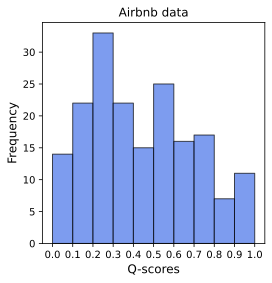

In [37]:
## defining colors
custom_palette = {
    0: (70/255, 114/255, 232/255),   # GoogleBlue
    1: (76/255, 150/255, 77/255),     # GoogleGreen
    2: (238/255, 179/255, 62/255)     # GoogleOrange
}

# Specify the bin edges to include values from 0.0 to 1.0
bin_edges = np.arange(0.0, 1.1, 0.1)

Q_metric_real = [round(value, 2) for value in Q_metric_real]
# Create a histogram with custom bin edges

# Set the figure size
plt.figure(figsize=(4, 4))  # Adjust width and height as needed
plt.hist(Q_metric_real, bins=bin_edges, edgecolor='black',align='mid',color=custom_palette[0],alpha=0.7)

# Add labels and title
plt.xlabel('Q-scores',fontname='DejaVu Sans', fontsize=12)
plt.ylabel('Frequency',fontname='DejaVu Sans', fontsize=12)
plt.title('Airbnb data',fontname='DejaVu Sans', fontsize=12)

# Set x-axis ticks to include values from 0.0 to 1.0
plt.xticks(bin_edges)

# Show the plot
#plt.savefig('airbnb.png', dpi=300, bbox_inches='tight')
plt.show()


## Q_scores of synthetic data generated by CTGAN 

In [38]:
Q_metric_ctgan = Q_metric(ctgan_syn_data, categorical_features)

There are no functional dependencies in the data.
There are some logical dependencies in the data.


KL Divergence score is: 5.586753488349505


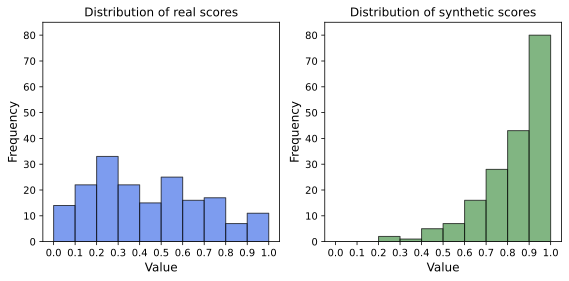

In [39]:
plot_scores(Q_metric_real,Q_metric_ctgan)

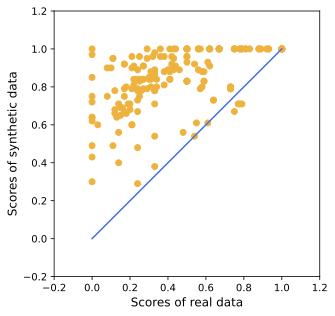

In [40]:
feature_pair_plot(Q_metric_real, Q_metric_ctgan)

## Q_scores of synthetic data genearted by CTABGAN 

In [41]:
Q_metric_ctabgan = Q_metric(ctabgan_syn_data, categorical_features)

There are no functional dependencies in the data.
There are some logical dependencies in the data.


KL Divergence score is: 19.234215189688626


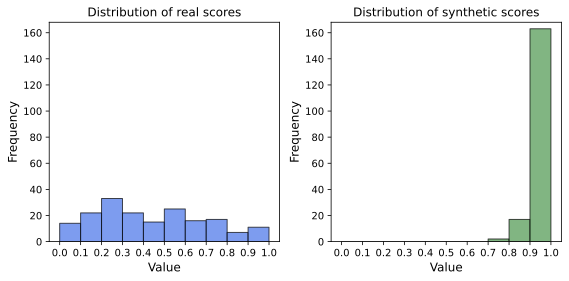

In [42]:
plot_scores(Q_metric_real,Q_metric_ctabgan)

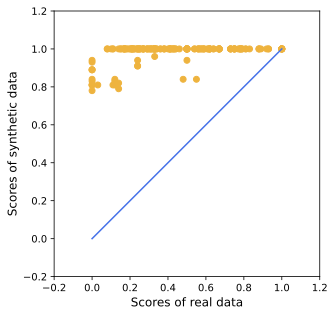

In [43]:
feature_pair_plot(Q_metric_real, Q_metric_ctabgan)

## Q_scores of synthetic data genearted by CTABGAN+

In [44]:
Q_metric_ctabgan_plus = Q_metric(ctabgan_plus_syn_data, categorical_features)

There are no functional dependencies in the data.
There are some logical dependencies in the data.


KL Divergence score is: 19.043165881641187


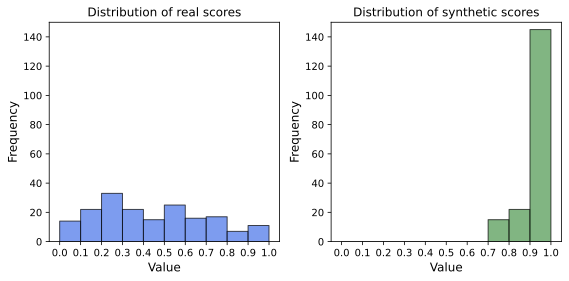

In [45]:
plot_scores(Q_metric_real,Q_metric_ctabgan_plus)

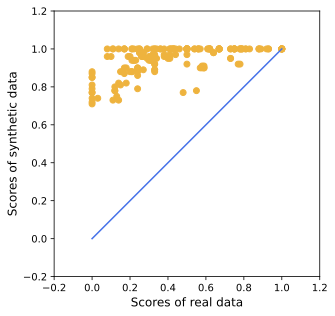

In [46]:
feature_pair_plot(Q_metric_real, Q_metric_ctabgan_plus)

## Q_scores of synthetic data genearted by TVAE

In [47]:
Q_metric_tvae = Q_metric(tvae_syn_data, categorical_features)

There are no functional dependencies in the data.
There are some logical dependencies in the data.


KL Divergence score is: 0.3744054967497732


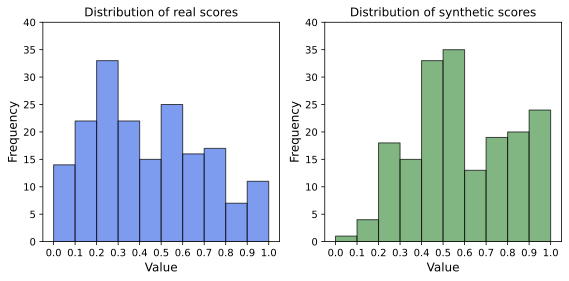

In [48]:
plot_scores(Q_metric_real,Q_metric_tvae)

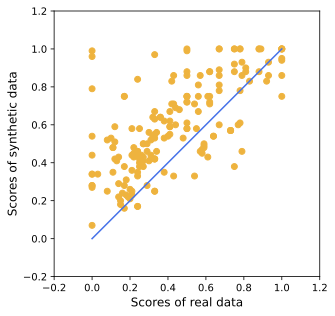

In [49]:
feature_pair_plot(Q_metric_real, Q_metric_tvae)

## Q_scores of synthetic data genearted by NextConvGen

In [50]:
Q_metric_nextconvgen = Q_metric(nextconvgen_syn_data, categorical_features)

There are no functional dependencies in the data.
There are some logical dependencies in the data.


KL Divergence score is: 1.9135849544799257


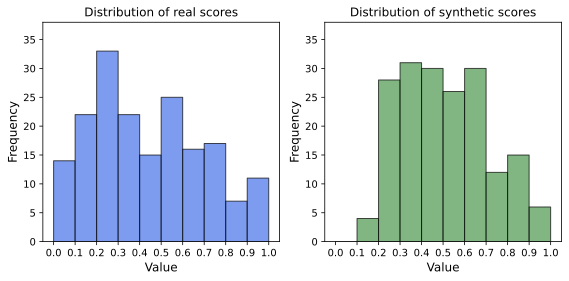

In [51]:
plot_scores(Q_metric_real,Q_metric_nextconvgen)

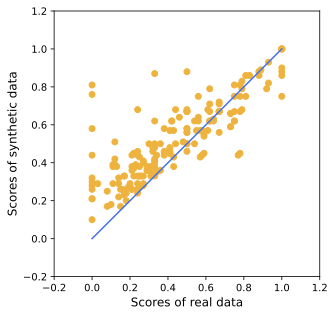

In [52]:
feature_pair_plot(Q_metric_real, Q_metric_nextconvgen)

## Q_scores of synthetic data genearted by TabDDPM

In [53]:
Q_metric_tabddpm = Q_metric(tabddpm_syn_data, categorical_features)

There are no functional dependencies in the data.
There are some logical dependencies in the data.


KL Divergence score is: 0.03917445576432303


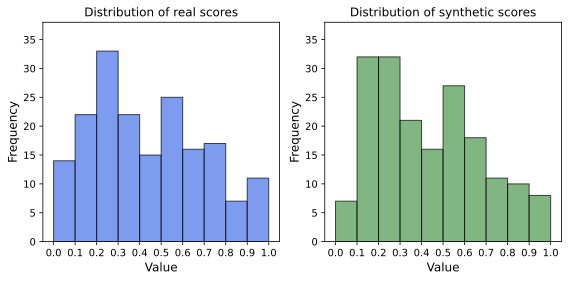

In [54]:
plot_scores(Q_metric_real,Q_metric_tabddpm)

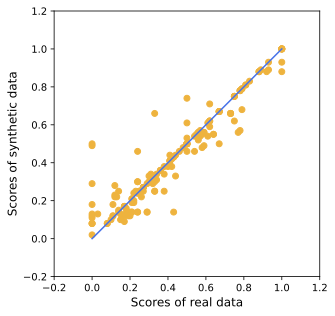

In [55]:
feature_pair_plot(Q_metric_real, Q_metric_tabddpm)

## Q_scores of synthetic data genearted by TabuLa

In [56]:
Q_metric_tabula = Q_metric(tabula_syn_data, categorical_features)

Functional dependency: id -> gender
Functional dependency: id -> signup_method
Functional dependency: id -> signup_flow
Functional dependency: id -> language
Functional dependency: id -> affiliate_channel
Functional dependency: id -> affiliate_provider
Functional dependency: id -> first_affiliate_tracked
Functional dependency: id -> signup_app
Functional dependency: id -> first_device_type
Functional dependency: id -> first_browser
Functional dependency: id -> country_destination
There are some logical dependencies in the data.


KL Divergence score is: 0.015394065865073287


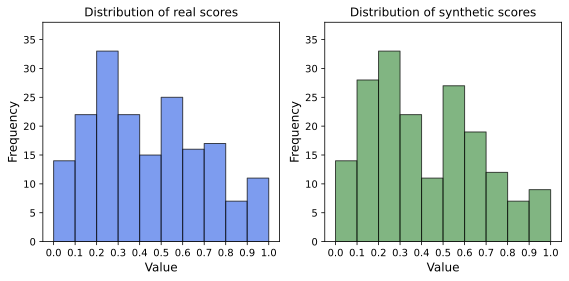

In [57]:
plot_scores(Q_metric_real,Q_metric_tabula)

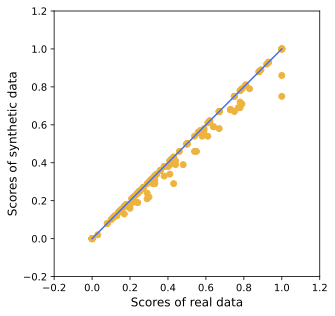

In [58]:
feature_pair_plot(Q_metric_real, Q_metric_tabula)

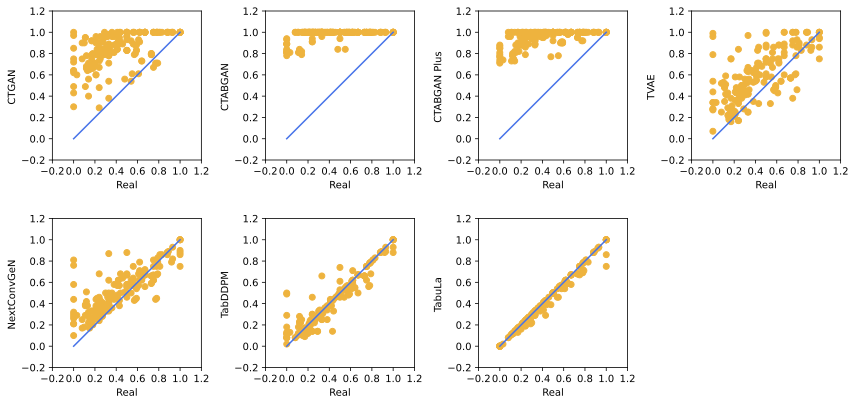

In [59]:
synthetic_data_lists = [Q_metric_ctgan, Q_metric_ctabgan, Q_metric_ctabgan_plus, Q_metric_tvae, Q_metric_nextconvgen, Q_metric_tabddpm,Q_metric_tabula]
feature_pair_plot_all(Q_metric_real, synthetic_data_lists)

## Comparing logical dependencies of real and synthetic data

## CTGAN

In [60]:
df_zero_ctgan, df_one_ctgan, real_dependencies, total_count, ctgan_match = common_dependencies(data,ctgan_syn_data, categorical_features)

Total number of logical dependencies in real data are: 24369
Total number of logical dependencies in synthetic data data are: 8500
The pecentange of dependencies preserved in synthetic data is : 34.880380811686976


In [61]:
df_one_ctgan.shape

(46, 6)

In [62]:
real_dependencies[real_dependencies['Probability']==1.0]

,Feature1,Level1,Feature2,Level2,Probability
0,id,0,gender,0,1.0
5,id,1,gender,3,1.0
6,id,2,gender,0,1.0
10,id,3,gender,1,1.0
12,id,4,gender,0,1.0
...,...,...,...,...,...
24280,device_type,7,first_browser,4,1.0
24322,device_type,7,country_destination,0,1.0
24331,device_type,8,country_destination,0,1.0
24345,device_type,4,action_type,4,1.0


## CTABGAN

In [63]:
df_zero_ctabgan, df_one_ctabgan, real_dependencies, total_count, ctabgan_match = common_dependencies(data,ctabgan_syn_data, categorical_features)

Total number of logical dependencies in real data are: 24369
Total number of logical dependencies in synthetic data data are: 166
The pecentange of dependencies preserved in synthetic data is : 0.681193319381181


## CTABGAN+

In [64]:
df_zero_ctabgan_plus, df_one_ctabgan_plus, real_dependencies, total_count, ctabgan_plus_match = common_dependencies(data,ctabgan_plus_syn_data, categorical_features)

Total number of logical dependencies in real data are: 24369
Total number of logical dependencies in synthetic data data are: 583
The pecentange of dependencies preserved in synthetic data is : 2.3923837662604126


## TVAE

In [65]:
df_zero_tvae, df_one_tvae, real_dependencies, total_count, tvae_match = common_dependencies(data,tvae_syn_data, categorical_features)

Total number of logical dependencies in real data are: 24369
Total number of logical dependencies in synthetic data data are: 13840
The pecentange of dependencies preserved in synthetic data is : 56.79346710985268


## NextConvGen

In [66]:
df_zero_nextconvgen, df_one_nextconvgen, real_dependencies, total_count, nextconvgen_match = common_dependencies(data,nextconvgen_syn_data, categorical_features)

Total number of logical dependencies in real data are: 24369
Total number of logical dependencies in synthetic data data are: 15442
The pecentange of dependencies preserved in synthetic data is : 63.367392999302396


In [67]:
df_one_nextconvgen.shape

(540, 6)

## Tabddpm

In [68]:
df_zero_tabddpm, df_one_tabddpm, real_dependencies, total_count, tabddpm_match = common_dependencies(data,tabddpm_syn_data, categorical_features)

Total number of logical dependencies in real data are: 24369
Total number of logical dependencies in synthetic data data are: 20133
The pecentange of dependencies preserved in synthetic data is : 82.61725963314046


In [69]:
df_one_tabddpm.shape

(1067, 6)

## TabuLa

In [70]:
df_zero_tabula, df_one_tabula, real_dependencies, total_count, tabula_match = common_dependencies(data,tabula_syn_data, categorical_features)

Total number of logical dependencies in real data are: 24369
Total number of logical dependencies in synthetic data data are: 24211
The pecentange of dependencies preserved in synthetic data is : 99.35163527432394
